In [1]:
import csv
import pandas as pd
import nltk
from nltk.corpus import stopwords   
from nltk.tokenize import word_tokenize  

df = pd.read_csv('train_full.csv',index_col = False)


In [15]:
 import nltk
>>> nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop_words = set(stopwords.words('english'))

In [4]:
#One data frame per class
df.dropna(inplace = True)
df['New_Sentence'] = df['New_Sentence'].astype(str)
grouped = df.groupby('Type')
df_resp = grouped.get_group('Responsibility')
df_req = grouped.get_group('Requirement')
df_skill = grouped.get_group('Skill')
df_sskill = grouped.get_group('SoftSkill')
df_exp = grouped.get_group('Experience')
df_ed = grouped.get_group('Education')
df_list = [df_resp,df_req,df_skill,df_sskill,df_exp,df_ed]

In [5]:
#this function cleans the data - removes /m converst to lower case and splits each word in sentence and adds to a list
def data_clean(df):
  import re
  final_word = []
  #for df in df_list:
  df['New_Sentence'] = df['New_Sentence'].astype(str)
  new_sen = df['New_Sentence'].tolist()
  for words in new_sen:
    print(words)
    words = words.split('/')
    for w in words:
      w = w.lower()
      w = w.split()
      final_word = final_word + w
  return final_word

In [6]:
#removes stop words
def remove_from_list(remove_list,input_list):
  for list_item in input_list:
    if list_item in remove_list:
      input_list.remove(list_item)
  return input_list

In [7]:
remove_words = ['and','or','but','the','of','is','at','I',
                'that','there','a','high','to','.','with','in','&','for',
                'these','them','as', 'well','able','for','on','you','will','nan',
                'his','be','bs','we', '','.']

In [8]:
#function to get the highest kes with highest values.  n = user input for to n highets valuess
def get_highest(dict1,n):
  N=n
  from operator import itemgetter
  f_dict = dict(sorted(dict1.items(), key = itemgetter(1), reverse = True)[:N])
  return f_dict

In [10]:
#probability of each class
def class_probablity(df_col):
  c_resp = 0
  c_req = 0
  c_ed = 0
  c_exp = 0
  c_skill = 0
  c_sskill = 0
  label = df['Type']
  for label in df['Type']:
    if label =='Responsibility':
      c_resp +=1
    elif label == 'Requirement':
      c_req +=1
    elif label == 'Experience':
      c_exp +=1
    elif label == 'Education':
      c_ed +=1
    elif label == 'Skill':
      c_skill+=1
    elif label =='SoftSkill':
      c_sskill +=1
  total_count = c_resp + c_req + c_exp + c_ed + c_skill+ c_sskill
  p_resp = c_resp/total_count
  p_req = c_req/total_count
  p_ed = c_ed/total_count
  p_exp = c_exp/total_count
  p_skill = c_skill/total_count
  p_softskill = c_sskill/total_count
  return c_resp,c_req,c_ed,c_exp,c_skill,c_sskill  , p_resp, p_req, p_ed, p_exp, p_skill, p_softskill

In [11]:
c_resp,c_req,c_ed,c_exp,c_skill,c_sskill, p_resp, p_req, p_ed, p_exp, p_skill, p_sskill  = class_probablity(df['Type'])
class_prob =[p_resp, p_req, p_ed, p_exp, p_skill, p_sskill]


In [12]:
sen = 'New_Sentence'
l = 'Type'

In [13]:
def create_dictionary(df_list,remove_words):
  import re
  count = 1
  s = 0
  dict1 = {}
  for i, d_list in enumerate(df_list):
    pattern = r'[^A-Za-z] '    
    for sent in d_list[sen]:  
      word_tokens = word_tokenize(sent)
      #for word in sent:
      for word in word_tokens:
        if word not in dict1:
          dict1[word]=1
        elif word in dict1:
          #this is a sentence counter
          s=s+1
          if s==1:
            dict1[word] +=1
          else:
            next
      s =0
  return dict1 

In [16]:
#create a dictonary with count of each word per document
doc_dictionary = create_dictionary(df_list,remove_words)
pd.DataFrame(doc_dictionary.items(), columns=['Label', 'Doc_count'])

,Label,Doc_count
0,Author,1
1,and/or,3
2,Review,98
3,architecture/design,1
4,and,227
...,...,...
31202,Degree/Diploma,1
31203,Science/Business,1
31204,B.E/B.TECH/M.E/M.TECH,1
31205,POV,1


In [ ]:
#dictionary with highest word count
dict_higest = get_highest(doc_dictionary,100)
print(dict_higest)

{'Experience': 2795, 'Ability': 2260, 'Strong': 1583, 'Bachelors': 1219, 'Minimum': 1009, 'Excellent': 932, 'The': 867, 'You': 846, 'Good': 840, 'Knowledge': 782, 'his': 745, 'Must': 692, '5+': 638, 'YOU': 556, 'Demonstrated': 539, '3+': 533, 'Should': 454, 'Work': 413, '2+': 396, 'A': 395, 'Proven': 387, 'This': 378, 'Develop': 330, 'Provide': 317, 'WE': 305, '5': 292, 'Support': 288, 'At': 275, 'Able': 257, '10+': 255, 'Working': 254, 'Understanding': 254, 'Lead': 252, '3': 246, 'Manage': 236, 'Ensure': 234, 'and': 227, 'Key': 226, 'Drive': 225, 'Be': 220, '1+': 209, 'JOB': 207, '2': 202, 'Responsible': 200, 'Advanced': 198, 'Bachelor': 194, 'Perform': 187, 'In': 187, 'Masters': 173, 'Hands': 169, '.': 165, 'As': 164, 'Project': 160, 'Technical': 160, 'Identify': 157, '7+': 154, 'High': 153, 'Extensive': 151, 'Previous': 147, 'Familiarity': 147, ',': 143, 'o': 143, '4+': 142, 'Design': 138, 'Basic': 137, 'Create': 136, 'Participate': 134, '8+': 128, 'An': 127, '#': 126, 'Effective': 

In [17]:
def create_dictionary_per_class(df,remove_words):
  s=0
  dict_class = {}
  for sent in df[sen]:  
    word_tokens = word_tokenize(sent)
    word_tokens = remove_from_list(remove_words,word_tokens)
      #for each word in each sentence in the dataset, create a dictionary. 
    for word in word_tokens:
        #if word is not in dictionary, add it to the dictionary and count = 1
      if word not in dict_class:
        dict_class[word]=1
            #if word is dictionary and the first occurence in the sentence increment in count
      elif word in dict_class:
        s=s+1
        if s==1:
          dict_class[word] +=1
        else:
          next
      s =0
  return dict_class

In [19]:
#function to remove words that have a count less than 7
def insignificant_words(in_dict):
  for key,value in dict(in_dict).items():
    if value < 7:
      del in_dict[key]
  return in_dict

In [20]:
resp_dict = create_dictionary_per_class(df_resp,remove_words)
print(resp_dict)


{'Author': 1, 'and/or': 154, 'Review': 127, 'architecture/design': 1, 'other': 445, 'technical': 718, 'documents': 102, 'ensuring': 139, 'quality': 457, 'deliverables': 85, 'systems': 396, 'development': 848, 'across': 382, 'tech': 9, 'stacks': 2, 'applications': 175, 'teams': 556, 'Should': 44, 'able': 24, 'develop': 401, 'custom': 31, 'dynamic': 19, 'shape': 17, ',': 11579, 'object': 2, 'script': 2, 'validation': 56, 'testing': 292, 'database': 42, 'Track': 30, 'department': 46, 'expenses': 9, 'capital': 52, 'budget': 81, 'Meet': 17, 'performance': 430, 'metrics': 142, 'Understand': 102, 'product': 677, 'line': 105, 'market': 190, 'drivers': 27, 'competitive': 80, 'threats/opportunities': 2, 'Identifies': 26, 'continuous': 153, 'improvement': 295, 'opportunities': 292, 'within': 457, 'analytics': 80, 'processes': 555, 'leads': 63, 'execution': 235, 'plans': 307, 'Working': 78, 'Sales': 236, 'Engineering': 167, 'Business': 213, 'Service': 138, 'Offering': 22, 'Leader': 71, 'be': 373, 

In [21]:
resp_dict = create_dictionary_per_class(df_resp,remove_words)
resp_dict = insignificant_words(resp_dict)
req_dict = create_dictionary_per_class(df_req,remove_words)
req_dict = insignificant_words(req_dict)
exp_dict = create_dictionary_per_class(df_exp,remove_words)
exp_dict = insignificant_words(exp_dict)
ed_dict = create_dictionary_per_class(df_ed,remove_words)
ed_dict = insignificant_words(ed_dict)
skill_dict = create_dictionary_per_class(df_skill,remove_words)
skill_dict = insignificant_words(skill_dict)
sskill_dict = create_dictionary_per_class(df_sskill,remove_words)
sskill_dict = insignificant_words(sskill_dict)

In [22]:
#this has not been used but will be used in futre for improvement of the model
resp_highest = get_highest(resp_dict,10)
req_highest = get_highest(req_dict,10)
exp_highest = get_highest(exp_dict,10)
ed_highest = get_highest(ed_dict,10)
skill_highest = get_highest(skill_dict,10)
sskill_highest = get_highest(sskill_dict,10)

In [23]:
def prob_word_label(input_sentence,label_dict,p_label,c_label):
  p = []
  prob = 1
  laplac = 1
  probwgl = 0.00
  #nc and v are used for Laplace adjustment.
  nc = 1
  v = 6
  #if the word exists calculate probability of the word given class
  for word in input_sentence:
    if word in label_dict.keys():
      ncw = label_dict[word]
      pwgy = ncw+nc/(c_label + v)
      p.append(pwgy)
  #if the word does not exist convert it to a very small probability 
  #instead of zero to prevent zero probablity
    else:
        ncw = 0
        pwgy = ncw+nc/(c_label + v)
        p.append(pwgy)
  for i in range(len(p)):
    prob = prob * p[i]
  probwgl = prob * p_label
  return probwgl

In [24]:
def clean_up(ip_sentence):
  ip_sentence = ''.join(char for char in ip_sentence if char.isalpha() or char == ' ')
  ip_sentence = ip_sentence.lower()
  ip_sentence = ip_sentence.split()
  ip_sentence = remove_from_list(remove_words,ip_sentence)
  return ip_sentence

In [25]:
import numpy as np
keys = np.array(df['Type'].unique())
keys

array(['Responsibility', 'Requirement', 'Skill', 'SoftSkill', 'Education',
       'Experience'], dtype=object)

In [27]:
#validation function
pred_list = []
dfv = pd.read_csv('val - Copy.csv',index_col = False)
dfv.dropna(inplace = True)
v_l = 'Type'
v_sen = 'New_Sentence'
dfv['New_Sentence'] = dfv['New_Sentence'].astype(str)
dfv['New_Sentence'].replace(r'\W',"")
for v_sentence in dfv['New_Sentence']:
  v_sentence = clean_up(v_sentence)
  probofrespgivensen = prob_word_label(v_sentence,resp_dict,p_resp,c_resp)
  probofreqgivensen= prob_word_label(v_sentence,req_dict,p_req,c_req)
  probofexpgivensen = prob_word_label(v_sentence,exp_dict,p_exp,c_exp)
  probofedgivensen = prob_word_label(v_sentence,ed_dict,p_ed,c_ed)
  probofskillgivensen= prob_word_label(v_sentence,skill_dict,p_skill,c_skill)
  probofsskillgivensen = prob_word_label(v_sentence,sskill_dict,p_sskill,c_sskill)
  list_to_dict = []
  list_to_dict = [probofrespgivensen,probofreqgivensen,
                  probofexpgivensen,probofedgivensen,
                  probofskillgivensen,probofsskillgivensen]
                  
  marginalize = (probofrespgivensen +probofreqgivensen + 
                 probofexpgivensen + probofedgivensen+
                 probofskillgivensen+probofsskillgivensen)
  prb_res = probofrespgivensen/marginalize
  prb_req = probofreqgivensen /marginalize
  prb_exp = probofexpgivensen /marginalize
  prb_ed = probofedgivensen /marginalize
  prb_skill  = probofskillgivensen /marginalize
  prb_sskill = probofsskillgivensen /marginalize
  find_max = [prb_res,prb_req,prb_exp,prb_ed,prb_skill,prb_sskill]
  keys = np.array(df['Type'].unique())
  keys
  import operator
  max_dict = {}
  max_dict = dict(zip(keys,find_max))
  max_dict = dict(sorted(max_dict.items(),key=operator.itemgetter(1),reverse=True))
  max_dict
  pred_label = max(max_dict, key=max_dict.get)
  #print(max_dict)
  pred_list.append(pred_label)
pred_list
dfv['Predicted'] = pred_list

In [34]:
import operator
max_dict = {}
max_dict = dict(zip(keys,find_max))
max_dict = dict(sorted(max_dict.items(),key=operator.itemgetter(1),reverse=True))
max_dict
pred_label = max(max_dict, key=max_dict.get)

In [29]:
dfv.head(10)

,Unnamed: 0,Sentence_id,New_Sentence,Type,Predicted
0,57160,INDSSK13980,Personal Qualities.,SoftSkill,Experience
1,57161,COGEDU40532,"Bachelors in Science, Technology, Engineering...",Education,SoftSkill
2,57162,GEREXP33975,Minimum 8 years of high-level distribution ma...,Experience,Skill
3,57163,INDRES13463,Provide data quality and integrity validation...,Responsibility,Responsibility
4,57164,PHERES3340,Ensure compliance.,Responsibility,Responsibility
5,57165,PHEREQ4247,Minimum 3+ yrs Development Exp in Cleo and ge...,Requirement,Skill
7,57167,GERRES8434,The HR Leader will have the opportunity to le...,Responsibility,Responsibility
8,57168,COGSSK7552,Excellent communication skills and the abilit...,SoftSkill,Requirement
9,57169,INDSKL33056,Direct experience leading safety initiatives ...,Skill,Responsibility
10,57170,PHEREQ20828,"Strong knowledge of Android SDK, different ver...",Requirement,Requirement


In [35]:
max_dictdf = pd.DataFrame(max_dict.items(), columns=['Class', 'Probability Sentence Belongs to Class'])
max_dictdf['Probability Sentence Belongs to Class'] = max_dictdf['Probability Sentence Belongs to Class'].round(decimals = 2)
print("The prediction is:",pred_label)
max_dictdf

The prediction is: SoftSkill


,Class,Probability Sentence Belongs to Class
0,SoftSkill,0.64
1,Requirement,0.26
2,Skill,0.10
3,Responsibility,0.00
4,Education,0.00
5,Experience,0.00


In [36]:
#accuracy
#Importing the required libraries
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
precision = precision_score(dfv['Type'], dfv['Predicted'],pos_label='positive',
                                           average='macro')
recall = recall_score(dfv['Type'], dfv['Predicted'],pos_label='positive',
                                           average='macro')
accuracy = accuracy_score(dfv['Type'], dfv['Predicted'])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [37]:
pra =  [precision,recall,accuracy]
metrics = pd.DataFrame(pra,index =['Precision','Recall','accuracy'],
                       columns = ['Model Metrics - With NLPTK'])
metrics

,Model Metrics - With NLPTK
Precision,0.223923
Recall,0.288500
accuracy,0.400898


In [38]:
cm = confusion_matrix(dfv['Type'], dfv['Predicted'])

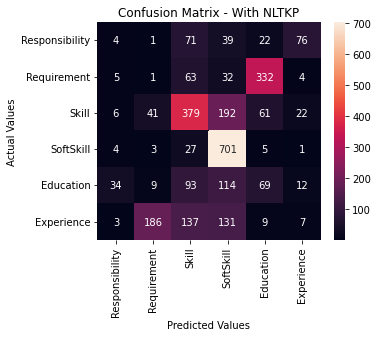

In [39]:
import seaborn as sns
cm_df = pd.DataFrame(cm,
                     index = keys,
                     columns = keys)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt = 'd')
plt.title('Confusion Matrix - With NLTKP')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()